In [2]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
from glob import glob

In [11]:
data_paths = glob('dataset/mnist_png/training/0/*.png')
data_paths[0]

'dataset/mnist_png/training/0\\1.png'

In [12]:
path = data_paths[0]
path

'dataset/mnist_png/training/0\\1.png'

In [15]:
# tensorflow에서 glob과 같은 기능
data_paths = tf.io.matching_files('dataset/mnist_png/training/0/*.png')
data_paths[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'dataset\\mnist_png\\training\\0\\1.png'>

In [16]:
path = data_paths[0]
path # tensor type으로 불러와짐

# glob과 큰 차이 X

<tf.Tensor: shape=(), dtype=string, numpy=b'dataset\\mnist_png\\training\\0\\1.png'>

## Load Image

data generator를 보기 전에 이미지 여는 과정을 한번 보자
- 이 과정을 잘 알고있으면 generator 부분에선 어떤 걸 해주는 지 알 수 있음

In [17]:
gfile = tf.io.read_file(path)

In [18]:
image = tf.io.decode_image(gfile) # numpy로 변환
image.shape

TensorShape([28, 28, 1])

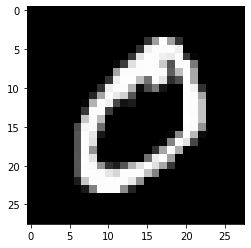

In [19]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

## Set Data Generator

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
datagen = ImageDataGenerator(
    # 전처리 할 것들
    rotation_range=20, # 회전?
    width_shift_range=0.2, # 앞 뒤로 움직여줌?
    height_shift_range=0.2, # 위 아래 움직여줌
    horizontal_flip=True # 뒤집어줌
)

In [22]:
image.shape

TensorShape([28, 28, 1])

In [23]:
inputs = image[tf.newaxis, ...]
inputs.shape # 4차원

# 이 image가 Data Generator를 거치면서 우리가 원하는 영상 전처리 실시됨
# Data Generator를 통해 Model에 데이터를 변환해서 넣어주는 것
# ex) 서있는 고양이를 뒤집어져있거나, 누워있거나 등등 데이터를 다양하게 변화를 줘서 이미지를 학습

TensorShape([1, 28, 28, 1])

In [24]:
image = next(iter(datagen.flow(inputs))) # 우선 1개만
# flow를 꼭 해줘야 함 (무엇을 지나가게 할 건지)
image.shape

(1, 28, 28, 1)

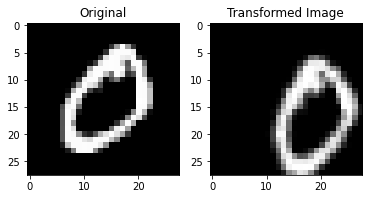

In [28]:
# plt.imshow(image[0,:,:,0], 'gray') # 이것도 되고, 아래 코드도 되고
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')
plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(image), 'gray')
plt.show()

# Data Generator를 통해 이런 식으로 변화를 주어서 Model에 학습함

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

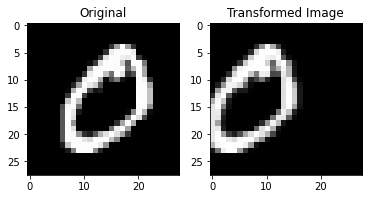

In [34]:
datagen = ImageDataGenerator(
    width_shift_range=0.3 # 좌우로 변경, # image size의 0.3%만 random하게 움직이겠다는 뜻
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

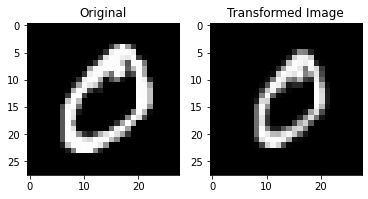

In [35]:
datagen = ImageDataGenerator(
    zoom_range=0.3 # 상하좌우로 늘림
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    # preprocessing_function= lambda 또는 tf.image.resize 등등 customize한 function 만들어서 넣을 수도 있음
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

## Rescale시 주의사항
- rescale은 train과 test 둘 다 해주되, augmentation은 train만 해줘야 함

In [37]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255. # test는 rescale만 !
    # 사소한 것 같아도 성능차이가 많이 난대
)